In [1]:
#Import Libraries
from bs4 import BeautifulSoup
import re
import pandas as pd




In [2]:
# Get_page_reviews function scrapes all reviews, titles, and scores
# and returns a data frame containing the results across 3 columns

def get_page_reviews(soup):
    # Initialise dataframe
    review_df = pd.DataFrame(columns = ["title","review","score"])
    
    # Return all review sections
    reviews = soup.find_all("div", {"class": "mb-0_wJE overflow-hidden_1pr card_12c card-full_1bA card-full-md_1Kd"})
    
    # Scrape relevant data for each review
    for review in reviews:
        score = review.find_all("div", {"class":  re.compile('me-1_2lk flex-shrink-0_2yX.*')})
        score = re.search('title="(\d)\sout\sof',str(score)).group(1)

        title = review.find_all("h3", {"class":  "mb-1_2Ff"})
        title = re.search('>(.+?)<',str(title)).group(1)

        reviews = review.find_all("div", {"class":  "relative_1Fn text-break_iZk"})
        for review_segment in reviews:
            review_start = review_segment.find('p')
            review_end = review_segment.find("span", {"class":  "d-none_21M"})

            if review_end is not None:
                review_complete = re.sub("\.\.\.$", "", review_start.text) + re.sub("^\.\.\.", "", review_end.text)
            else:
                review_complete = review_start.text

            review_df = review_df.append(pd.DataFrame([[title, review_complete, score]], columns = ["title","review","score"]))
            
    return review_df

    

In [3]:
# Create empty dataframe for vodafone reviews
vodafone_reviews = pd.DataFrame(columns = ["title","review","score"])

#vodafone_reviews = pd.read_csv('vodafone_reviews.csv')  

In [6]:
from os import listdir
from os.path import isfile, join

data_path = 'C:\\Users\\matth\\Documents\\Uni Work\\Data Science Project 1\\VF Reviews'

file_list = [f for f in listdir(data_path) if isfile(join(data_path, f))]

#print(file_list)

In [7]:


# loop through all vodafone review pages, and add reviews to vodafone_review dataframe
for file in file_list:
    
        
    # load  and parse the next page of reviews
    try:
        cur_file = open(data_path + "\\" + file)
        print(data_path + "\\" + file)
        page = cur_file.read()
        cur_file.close()

        # print(page)
        soup = BeautifulSoup(page, 'html.parser')

        # get reviews on current page
        cur_reviews = get_page_reviews(soup)


        # Append reviews for current page
        vodafone_reviews = vodafone_reviews.append(cur_reviews)
    except:
        print("an error occured with file: " + data_path + "\\" + file)



C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 10) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 100) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 101) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 102) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 103) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 104) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 105) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 106) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodaf

C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 17) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 18) _ ProductReview.com.au.html
an error occured with file: C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 18) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 19) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 2) _ ProductReview.com.au.html
an error occured with file: C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 2) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 20) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 21) _ ProductReview.com.au.html
C:\Users\matth\Documents\U

C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 67) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 68) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 69) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 7) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 70) _ ProductReview.com.au.html
an error occured with file: C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 70) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 71) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 72) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Projec

In [8]:
print(len(vodafone_reviews))

1903


In [9]:
vodafone_reviews.to_csv ('vodafone_reviews.csv', index = None, header=True)

<AxesSubplot:>

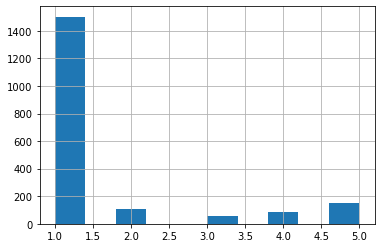

In [10]:
##########################################
##  Some EDA

vodafone_reviews['score'] = pd.to_numeric(vodafone_reviews['score'])

vodafone_reviews['score'].hist()

In [11]:
### Set all text to lower case

vodafone_reviews['review'] = vodafone_reviews['review'].str.lower()
vodafone_reviews['title'] = vodafone_reviews['title'].str.lower()


<AxesSubplot:>

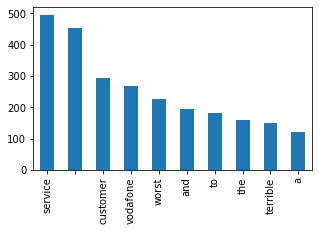

In [12]:
def strip_punct(word):
    word =  re.sub("[,\.;:\(\)\{\}\[\]!?\"\s\n]+", " ", word)
    word =  re.sub("\s+", " ", word)
    return word

def list_of_words(df, column):
    word_frame = pd.DataFrame(columns = ["words"])
    for i in range(len(df)):
        words = strip_punct(df[column].iloc[i])
        words = words.split(" ")
        word_frame = word_frame.append(pd.DataFrame(words,columns = ["words"]))
        
    return word_frame




word_frame = list_of_words(vodafone_reviews, "title")

word_frame["words"].value_counts().head(10).plot(kind='bar',figsize=(5,3))


<AxesSubplot:>

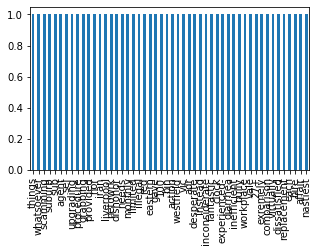

In [13]:
word_frame["words"].value_counts().tail(50).plot(kind='bar',figsize=(5,3))